In [1]:
import os
import pandas as pd
import xarray as xr
import urllib
import re
import geopandas as gpd
from shapely.geometry import Point


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Food for thought:
    CRW's official gauge for the coral reef watch has boundaries that incr from about
    Long: 131.5 -> 136.5
    Lat: 5 -> 10
    increasing by 2 degrees for 5-8 and by 2 degrees more again for 9-12
    Thus, final map encompasses     
    Long: 127.5 -> 140.5, to 
    Lat: 1->14
    
   
However, the EEZ would be contained in this boundary:
    Long: 129.5088 -> 136.9541
    Lat: 1.6214 -> 11.5587
But, this is a coral product - so EEZ does not equal the area where the corals are

Thus, geoJSON will be made for historic, current, and projection encompassing the area the 9-12 outlook has
since it contains the boundaries for all CRW gauges in addition to the EEZ. 
Which is:
 Long: 127.5 -> 140.5,
 Lat: 1->14


In [2]:
def palau_eez(df):
    df_eez = gpd.read_file('../palauEEZ.geojson')
    eez = df_eez['geometry'].values[0]
    in_palau = []
    longlat = df[['lon','lat']].values.tolist()
    for x in longlat:
        point = Point(x[0],x[1])
        if eez.contains(point) or point.within(eez):
            in_palau.append((x[0],x[1]))
    return df[df[['lon', 'lat']].apply(tuple, axis=1).isin(in_palau)]

In [76]:
def filter_box(df):
    if "lat" in df:
        filtered = df[(df["lat"]>= 0.99)&
                                    (df["lat"]<=14.01)&(df["lon"]<=140.51)&
                                    (df["lon"]>=127.49)]
    else:
        filtered = df[(df["latitude"]>= 0.99)&
                                    (df["latitude"]<=14.01)&(df["longitude"]<=140.51)&
                                    (df["longitude"]>=127.49)]
    return filtered

In [4]:
os.getcwd() 

'/Users/one/Documents/Palau-Graphics/CFS-CRW'

In [ ]:
#https://coralreefwatch.noaa.gov/product/vs/data/palau.txt

In [108]:
#Start folder is 2011, end is 2023
#Start file is 

url = "https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/"

hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

rates = ['0'+str(10*x) if x<10 else str(10*x) for x in range(1,11)]

file_years = {}

for x in range(2011,2023+1):
    print(x)
    
    request=urllib.request.Request(url+str(x),None,hdr) #The assembled request
    response = urllib.request.urlopen(request)
    data = response.read()
    file_rates = {}
    
    for rate in rates:
        print(rate)
        files = []
        filestarts =[a.start() for a in list(re.finditer("cfsv2_outlook-"+ rate + "perc_4mon-and-wkly_v5_icwk", str(data)))]
        for filestart in filestarts:
            substr = str(data)[filestart:]
            file = substr[:substr.find('.nc')]
            if file + ".nc" not in files:
                files.append(file + ".nc")
        file_rates[rate] = files
    file_years[x] = file_rates

2011
010
020
030
040
050
060
070
080
090
100
2012
010
020
030
040
050
060
070
080
090
100
2013
010
020
030
040
050
060
070
080
090
100
2014
010
020
030
040
050
060
070
080
090
100
2015
010
020
030
040
050
060
070
080
090
100
2016
010
020
030
040
050
060
070
080
090
100
2017
010
020
030
040
050
060
070
080
090
100
2018
010
020
030
040
050
060
070
080
090
100
2019
010
020
030
040
050
060
070
080
090
100
2020
010
020
030
040
050
060
070
080
090
100
2021
010
020
030
040
050
060
070
080
090
100
2022
010
020
030
040
050
060
070
080
090
100
2023
010
020
030
040
050
060
070
080
090
100


In [ ]:
file_years

{2011: {'010': ['cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110703_for_20110717to20111030.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110710_for_20110724to20111030.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110717_for_20110731to20111030.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110724_for_20110807to20111127.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110731_for_20110814to20111127.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110807_for_20110821to20111127.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110814_for_20110828to20111127.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110821_for_20110904to20111225.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110828_for_20110911to20111225.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110904_for_20110918to20111225.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110911_for_20110925to20111225.nc',
   'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110918_for_201

In [112]:
for f in file_years:
    for x in file_years[f]:
        print(file_years[f][x])
        break
    break

['cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110703_for_20110717to20111030.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110710_for_20110724to20111030.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110717_for_20110731to20111030.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110724_for_20110807to20111127.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110731_for_20110814to20111127.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110807_for_20110821to20111127.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110814_for_20110828to20111127.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110821_for_20110904to20111225.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110828_for_20110911to20111225.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110904_for_20110918to20111225.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110911_for_20110925to20111225.nc', 'cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20110918_for_20111002to20120129.nc', 'cfsv2_outlook-010perc_4mon

In [76]:
if not os.path.exists("./CRW-Outlook"):
    os.makedirs("./CRW-Outlook")

In [156]:
for year in file_years:
    if not os.path.exists("./CRW-Outlook/" + "/" + str(year) + "/"):
        os.makedirs("./CRW-Outlook" + "/" + str(year) + "/")
    for file_rate in file_years[year]:
        
        if not os.path.exists("./CRW-Outlook/" + "/" + str(year) + "/" + file_rate):
            os.makedirs("./CRW-Outlook" + "/" + str(year) + "/" + file_rate)
            
        for file in file_years[year][file_rate]:
            if file in os.listdir("./CRW-Outlook/" + str(year) + "/" + file_rate + '/'):
                continue
            filepath = url + str(year) + '/' + file
            print(filepath)
            urllib.request.urlretrieve(filepath,
                               "./CRW-Outlook/" + str(year) + "/" + file_rate + '/' + file)

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20120212_for_20120226to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20120219_for_20120304to20120624.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20120226_for_20120311to20120624.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20120304_for_20120318to20120624.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20120311_for_20120325to20120624.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20120318_for_20120401to20120729.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20120129_for_20120212to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20120205_for_20120219to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20120212_for_20120226to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20120219_for_20120304to20120624.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20120226_for_20120311to20120624.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20120304_for_20120318to20120624.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20120115_for_20120129to20120429.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20120122_for_20120205to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20120129_for_20120212to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20120205_for_20120219to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20120212_for_20120226to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20120219_for_20120304to20120624.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20120101_for_20120115to20120429.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20120108_for_20120122to20120429.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20120115_for_20120129to20120429.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20120122_for_20120205to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20120129_for_20120212to20120527.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20120205_for_20120219to20120527.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20121223_for_20130106to20130428.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2012/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20121230_for_20130113to20130428.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20130106_for_20130120to20130428.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20130113_for_20130127to20130428.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20130120_for_20130203to20130526.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20130127_for_20130210to20130526.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20131215_for_20131229to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20131222_for_20140105to20140427.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20131229_for_20140112to20140427.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20130106_for_20130120to20130428.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20130113_for_20130127to20130428.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20130120_for_20130203to20130526.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20131208_for_20131222to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20131215_for_20131229to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20131222_for_20140105to20140427.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20131229_for_20140112to20140427.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20130106_for_20130120to20130428.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20130113_for_20130127to20130428.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20131201_for_20131215to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20131208_for_20131222to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20131215_for_20131229to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20131222_for_20140105to20140427.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20131229_for_20140112to20140427.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20130106_for_20130120to20130428.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20131124_for_20131208to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20131201_for_20131215to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20131208_for_20131222to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20131215_for_20131229to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20131222_for_20140105to20140427.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20131229_for_20140112to20140427.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20131117_for_20131201to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20131124_for_20131208to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20131201_for_20131215to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20131208_for_20131222to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20131215_for_20131229to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20131222_for_20140105to20140427.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20131110_for_20131124to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20131117_for_20131201to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20131124_for_20131208to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20131201_for_20131215to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20131208_for_20131222to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20131215_for_20131229to20140330.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20131103_for_20131117to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20131110_for_20131124to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20131117_for_20131201to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20131124_for_20131208to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20131201_for_20131215to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20131208_for_20131222to20140330.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20131027_for_20131110to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20131103_for_20131117to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20131110_for_20131124to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20131117_for_20131201to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20131124_for_20131208to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20131201_for_20131215to20140330.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20131020_for_20131103to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20131027_for_20131110to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20131103_for_20131117to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20131110_for_20131124to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20131117_for_20131201to20140330.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20131124_for_20131208to20140330.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20131013_for_20131027to20140126.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20131020_for_20131103to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20131027_for_20131110to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20131103_for_20131117to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20131110_for_20131124to20140223.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2013/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20131117_for_20131201to20140330.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20141005_for_20141019to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20141012_for_20141026to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20141019_for_20141102to20150222.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20141026_for_20141109to20150222.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20141102_for_20141116to20150222.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20141109_for_20141123to20150222.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20140928_for_20141012to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20141005_for_20141019to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20141012_for_20141026to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20141019_for_20141102to20150222.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20141026_for_20141109to20150222.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20141102_for_20141116to20150222.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20140921_for_20141005to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20140928_for_20141012to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20141005_for_20141019to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20141012_for_20141026to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20141019_for_20141102to20150222.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20141026_for_20141109to20150222.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20140914_for_20140928to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20140921_for_20141005to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20140928_for_20141012to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20141005_for_20141019to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20141012_for_20141026to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20141019_for_20141102to20150222.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20140907_for_20140921to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20140914_for_20140928to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20140921_for_20141005to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20140928_for_20141012to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20141005_for_20141019to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20141012_for_20141026to20150125.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20140831_for_20140914to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20140907_for_20140921to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20140914_for_20140928to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20140921_for_20141005to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20140928_for_20141012to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20141005_for_20141019to20150125.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20140824_for_20140907to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20140831_for_20140914to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20140907_for_20140921to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20140914_for_20140928to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20140921_for_20141005to20150125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20140928_for_20141012to20150125.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20140817_for_20140831to20141130.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20140824_for_20140907to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20140831_for_20140914to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20140907_for_20140921to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20140914_for_20140928to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20140921_for_20141005to20150125.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20140810_for_20140824to20141130.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20140817_for_20140831to20141130.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20140824_for_20140907to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20140831_for_20140914to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20140907_for_20140921to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20140914_for_20140928to20141228.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20140803_for_20140817to20141130.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20140810_for_20140824to20141130.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20140817_for_20140831to20141130.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20140824_for_20140907to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20140831_for_20140914to20141228.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2014/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20140907_for_20140921to20141228.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20150726_for_20150809to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20150802_for_20150816to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20150809_for_20150823to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20150816_for_20150830to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20150823_for_20150906to20151227.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20150830_for_20150913to20151227.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20150719_for_20150802to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20150726_for_20150809to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20150802_for_20150816to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20150809_for_20150823to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20150816_for_20150830to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20150823_for_20150906to20151227.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20150712_for_20150726to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20150719_for_20150802to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20150726_for_20150809to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20150802_for_20150816to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20150809_for_20150823to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20150816_for_20150830to20151129.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20150705_for_20150719to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20150712_for_20150726to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20150719_for_20150802to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20150726_for_20150809to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20150802_for_20150816to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20150809_for_20150823to20151129.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20150628_for_20150712to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20150705_for_20150719to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20150712_for_20150726to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20150719_for_20150802to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20150726_for_20150809to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20150802_for_20150816to20151129.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20150621_for_20150705to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20150628_for_20150712to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20150705_for_20150719to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20150712_for_20150726to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20150719_for_20150802to20151129.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20150726_for_20150809to20151129.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20150614_for_20150628to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20150621_for_20150705to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20150628_for_20150712to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20150705_for_20150719to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20150712_for_20150726to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20150719_for_20150802to20151129.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20150607_for_20150621to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20150614_for_20150628to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20150621_for_20150705to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20150628_for_20150712to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20150705_for_20150719to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20150712_for_20150726to20151025.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20150531_for_20150614to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20150607_for_20150621to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20150614_for_20150628to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20150621_for_20150705to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20150628_for_20150712to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20150705_for_20150719to20151025.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20150524_for_20150607to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20150531_for_20150614to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20150607_for_20150621to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20150614_for_20150628to20150927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20150621_for_20150705to20151025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2015/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20150628_for_20150712to20151025.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20160515_for_20160529to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20160522_for_20160605to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20160529_for_20160612to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20160605_for_20160619to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20160612_for_20160626to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20160619_for_20160703to20161030.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20160508_for_20160522to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20160515_for_20160529to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20160522_for_20160605to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20160529_for_20160612to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20160605_for_20160619to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20160612_for_20160626to20160925.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20160501_for_20160515to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20160508_for_20160522to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20160515_for_20160529to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20160522_for_20160605to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20160529_for_20160612to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20160605_for_20160619to20160925.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20160424_for_20160508to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20160501_for_20160515to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20160508_for_20160522to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20160515_for_20160529to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20160522_for_20160605to20160925.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20160529_for_20160612to20160925.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20160417_for_20160501to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20160424_for_20160508to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20160501_for_20160515to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20160508_for_20160522to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20160515_for_20160529to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20160522_for_20160605to20160925.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20160410_for_20160424to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20160417_for_20160501to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20160424_for_20160508to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20160501_for_20160515to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20160508_for_20160522to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20160515_for_20160529to20160828.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20160403_for_20160417to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20160410_for_20160424to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20160417_for_20160501to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20160424_for_20160508to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20160501_for_20160515to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20160508_for_20160522to20160828.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20160327_for_20160410to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20160403_for_20160417to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20160410_for_20160424to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20160417_for_20160501to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20160424_for_20160508to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20160501_for_20160515to20160828.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20160320_for_20160403to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20160327_for_20160410to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20160403_for_20160417to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20160410_for_20160424to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20160417_for_20160501to20160828.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20160424_for_20160508to20160828.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20160313_for_20160327to20160626.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20160320_for_20160403to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20160327_for_20160410to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20160403_for_20160417to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20160410_for_20160424to20160731.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2016/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20160417_for_20160501to20160828.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20170305_for_20170319to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20170312_for_20170326to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20170319_for_20170402to20170730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20170326_for_20170409to20170730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20170402_for_20170416to20170730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20170409_for_20170423to20170730.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20170219_for_20170305to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20170226_for_20170312to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20170305_for_20170319to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20170312_for_20170326to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20170319_for_20170402to20170730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20170326_for_20170409to20170730.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20170205_for_20170219to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20170212_for_20170226to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20170219_for_20170305to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20170226_for_20170312to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20170305_for_20170319to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20170312_for_20170326to20170625.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20170122_for_20170205to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20170129_for_20170212to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20170205_for_20170219to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20170212_for_20170226to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20170219_for_20170305to20170625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20170226_for_20170312to20170625.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20170108_for_20170122to20170430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20170115_for_20170129to20170430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20170122_for_20170205to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20170129_for_20170212to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20170205_for_20170219to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20170212_for_20170226to20170528.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20171231_for_20180114to20180429.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20170101_for_20170115to20170430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20170108_for_20170122to20170430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20170115_for_20170129to20170430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20170122_for_20170205to20170528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20170129_for_20170212to20170528.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20171217_for_20171231to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20171224_for_20180107to20180429.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20171231_for_20180114to20180429.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20170101_for_20170115to20170430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20170108_for_20170122to20170430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20170115_for_20170129to20170430.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20171203_for_20171217to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20171210_for_20171224to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20171217_for_20171231to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20171224_for_20180107to20180429.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20171231_for_20180114to20180429.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20170101_for_20170115to20170430.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20171119_for_20171203to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20171126_for_20171210to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20171203_for_20171217to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20171210_for_20171224to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20171217_for_20171231to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20171224_for_20180107to20180429.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20171105_for_20171119to20180225.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20171112_for_20171126to20180225.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20171119_for_20171203to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20171126_for_20171210to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20171203_for_20171217to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20171210_for_20171224to20180325.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20171022_for_20171105to20180225.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20171029_for_20171112to20180225.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20171105_for_20171119to20180225.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20171112_for_20171126to20180225.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20171119_for_20171203to20180325.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2017/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20171126_for_20171210to20180325.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20181014_for_20181028to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20181021_for_20181104to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20181028_for_20181111to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20181104_for_20181118to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20181111_for_20181125to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20181118_for_20181202to20190331.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20181007_for_20181021to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20181014_for_20181028to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20181021_for_20181104to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20181028_for_20181111to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20181104_for_20181118to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20181111_for_20181125to20190224.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20180930_for_20181014to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20181007_for_20181021to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20181014_for_20181028to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20181021_for_20181104to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20181028_for_20181111to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20181104_for_20181118to20190224.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20180923_for_20181007to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20180930_for_20181014to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20181007_for_20181021to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20181014_for_20181028to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20181021_for_20181104to20190224.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20181028_for_20181111to20190224.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20180916_for_20180930to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20180923_for_20181007to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20180930_for_20181014to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20181007_for_20181021to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20181014_for_20181028to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20181021_for_20181104to20190224.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20180909_for_20180923to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20180916_for_20180930to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20180923_for_20181007to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20180930_for_20181014to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20181007_for_20181021to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20181014_for_20181028to20190127.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20180902_for_20180916to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20180909_for_20180923to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20180916_for_20180930to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20180923_for_20181007to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20180930_for_20181014to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20181007_for_20181021to20190127.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20180826_for_20180909to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20180902_for_20180916to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20180909_for_20180923to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20180916_for_20180930to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20180923_for_20181007to20190127.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20180930_for_20181014to20190127.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20180819_for_20180902to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20180826_for_20180909to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20180902_for_20180916to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20180909_for_20180923to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20180916_for_20180930to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20180923_for_20181007to20190127.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20180812_for_20180826to20181125.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20180819_for_20180902to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20180826_for_20180909to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20180902_for_20180916to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20180909_for_20180923to20181230.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2018/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20180916_for_20180930to20181230.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20190804_for_20190818to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20190811_for_20190825to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20190818_for_20190901to20191229.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20190825_for_20190908to20191229.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20190901_for_20190915to20191229.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20190908_for_20190922to20191229.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20190728_for_20190811to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20190804_for_20190818to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20190811_for_20190825to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20190818_for_20190901to20191229.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20190825_for_20190908to20191229.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20190901_for_20190915to20191229.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20190721_for_20190804to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20190728_for_20190811to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20190804_for_20190818to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20190811_for_20190825to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20190818_for_20190901to20191229.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20190825_for_20190908to20191229.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20190714_for_20190728to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20190721_for_20190804to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20190728_for_20190811to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20190804_for_20190818to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20190811_for_20190825to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20190818_for_20190901to20191229.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20190707_for_20190721to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20190714_for_20190728to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20190721_for_20190804to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20190728_for_20190811to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20190804_for_20190818to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20190811_for_20190825to20191124.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20190630_for_20190714to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20190707_for_20190721to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20190714_for_20190728to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20190721_for_20190804to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20190728_for_20190811to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20190804_for_20190818to20191124.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20190623_for_20190707to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20190630_for_20190714to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20190707_for_20190721to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20190714_for_20190728to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20190721_for_20190804to20191124.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20190728_for_20190811to20191124.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20190616_for_20190630to20190929.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20190623_for_20190707to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20190630_for_20190714to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20190707_for_20190721to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20190714_for_20190728to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20190721_for_20190804to20191124.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20190609_for_20190623to20190929.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20190616_for_20190630to20190929.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20190623_for_20190707to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20190630_for_20190714to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20190707_for_20190721to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20190714_for_20190728to20191027.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20190602_for_20190616to20190929.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20190609_for_20190623to20190929.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20190616_for_20190630to20190929.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20190623_for_20190707to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20190630_for_20190714to20191027.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2019/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20190707_for_20190721to20191027.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20200524_for_20200607to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20200531_for_20200614to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20200607_for_20200621to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20200614_for_20200628to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20200621_for_20200705to20201025.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20200628_for_20200712to20201025.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20200517_for_20200531to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20200524_for_20200607to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20200531_for_20200614to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20200607_for_20200621to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20200614_for_20200628to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20200621_for_20200705to20201025.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20200510_for_20200524to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20200517_for_20200531to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20200524_for_20200607to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20200531_for_20200614to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20200607_for_20200621to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20200614_for_20200628to20200927.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20200503_for_20200517to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20200510_for_20200524to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20200517_for_20200531to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20200524_for_20200607to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20200531_for_20200614to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20200607_for_20200621to20200927.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20200426_for_20200510to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20200503_for_20200517to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20200510_for_20200524to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20200517_for_20200531to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20200524_for_20200607to20200927.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20200531_for_20200614to20200927.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20200419_for_20200503to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20200426_for_20200510to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20200503_for_20200517to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20200510_for_20200524to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20200517_for_20200531to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20200524_for_20200607to20200927.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20200412_for_20200426to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20200419_for_20200503to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20200426_for_20200510to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20200503_for_20200517to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20200510_for_20200524to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20200517_for_20200531to20200830.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20200405_for_20200419to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20200412_for_20200426to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20200419_for_20200503to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20200426_for_20200510to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20200503_for_20200517to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20200510_for_20200524to20200830.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20200329_for_20200412to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20200405_for_20200419to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20200412_for_20200426to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20200419_for_20200503to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20200426_for_20200510to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20200503_for_20200517to20200830.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20200322_for_20200405to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20200329_for_20200412to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20200405_for_20200419to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20200412_for_20200426to20200726.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20200419_for_20200503to20200830.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2020/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20200426_for_20200510to20200830.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20210314_for_20210328to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20210321_for_20210404to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20210328_for_20210411to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20210404_for_20210418to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20210411_for_20210425to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20210418_for_20210502to20210829.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20210307_for_20210321to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20210314_for_20210328to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20210321_for_20210404to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20210328_for_20210411to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20210404_for_20210418to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20210411_for_20210425to20210725.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20210228_for_20210314to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20210307_for_20210321to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20210314_for_20210328to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20210321_for_20210404to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20210328_for_20210411to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20210404_for_20210418to20210725.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20210221_for_20210307to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20210228_for_20210314to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20210307_for_20210321to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20210314_for_20210328to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20210321_for_20210404to20210725.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20210328_for_20210411to20210725.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20210214_for_20210228to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20210221_for_20210307to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20210228_for_20210314to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20210307_for_20210321to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20210314_for_20210328to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20210321_for_20210404to20210725.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20210207_for_20210221to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20210214_for_20210228to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20210221_for_20210307to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20210228_for_20210314to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20210307_for_20210321to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20210314_for_20210328to20210627.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20210131_for_20210214to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20210207_for_20210221to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20210214_for_20210228to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20210221_for_20210307to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20210228_for_20210314to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20210307_for_20210321to20210627.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20210124_for_20210207to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20210131_for_20210214to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20210207_for_20210221to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20210214_for_20210228to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20210221_for_20210307to20210627.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20210228_for_20210314to20210627.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20210117_for_20210131to20210425.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20210124_for_20210207to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20210131_for_20210214to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20210207_for_20210221to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20210214_for_20210228to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20210221_for_20210307to20210627.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20210110_for_20210124to20210425.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20210117_for_20210131to20210425.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20210124_for_20210207to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20210131_for_20210214to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20210207_for_20210221to20210530.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2021/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20210214_for_20210228to20210530.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20220102_for_20220116to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20220109_for_20220123to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20220116_for_20220130to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20220123_for_20220206to20220529.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20220130_for_20220213to20220529.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20220206_for_20220220to20220529.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-010perc_4mon-and-wkly_v5_icwk20221225_for_20230108to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20220102_for_20220116to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20220109_for_20220123to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20220116_for_20220130to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20220123_for_20220206to20220529.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20220130_for_20220213to20220529.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20221218_for_20230101to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20221225_for_20230108to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20220102_for_20220116to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20220109_for_20220123to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20220116_for_20220130to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20220123_for_20220206to20220529.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20221211_for_20221225to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20221218_for_20230101to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-030perc_4mon-and-wkly_v5_icwk20221225_for_20230108to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20220102_for_20220116to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20220109_for_20220123to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20220116_for_20220130to20220424.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20221204_for_20221218to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20221211_for_20221225to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20221218_for_20230101to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20221225_for_20230108to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20220102_for_20220116to20220424.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20220109_for_20220123to20220424.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20221127_for_20221211to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20221204_for_20221218to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20221211_for_20221225to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20221218_for_20230101to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20221225_for_20230108to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20220102_for_20220116to20220424.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20221120_for_20221204to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20221127_for_20221211to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20221204_for_20221218to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20221211_for_20221225to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20221218_for_20230101to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20221225_for_20230108to20230430.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20221113_for_20221127to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20221120_for_20221204to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20221127_for_20221211to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20221204_for_20221218to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20221211_for_20221225to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20221218_for_20230101to20230430.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20221106_for_20221120to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20221113_for_20221127to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20221120_for_20221204to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20221127_for_20221211to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20221204_for_20221218to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-080perc_4mon-and-wkly_v5_icwk20221211_for_20221225to20230326.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20221030_for_20221113to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20221106_for_20221120to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20221113_for_20221127to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20221120_for_20221204to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20221127_for_20221211to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20221204_for_20221218to20230326.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20221023_for_20221106to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20221030_for_20221113to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20221106_for_20221120to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20221113_for_20221127to20230226.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20221120_for_20221204to20230326.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2022/cfsv2_outlook-100perc_4mon-and-wkly_v5_icwk20221127_for_20221211to20230326.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20230326_for_20230409to20230730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20230402_for_20230416to20230730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20230409_for_20230423to20230730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20230416_for_20230430to20230730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20230423_for_20230507to20230827.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-020perc_4mon-and-wkly_v5_icwk20230430_for_20230514to20230827.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20230205_for_20230219to20230528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20230212_for_20230226to20230528.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20230219_for_20230305to20230625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20230226_for_20230312to20230625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20230305_for_20230319to20230625.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-040perc_4mon-and-wkly_v5_icwk20230312_for_20230326to20230625.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20230709_for_20230723to20231029.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-050perc_4mon-and-wkly_v5_icwk20230716_for_20230730to20231029.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20230101_for_20230115to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20230108_for_20230122to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20230115_for_20230129to20230430.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-060perc_4mon-and-wkly_v5_icwk20230122_for_20230205to20230528.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20230521_for_20230604to20230924.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20230528_for_20230611to20230924.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20230604_for_20230618to20230924.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20230611_for_20230625to20230924.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20230618_for_20230702to20231029.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-070perc_4mon-and-wkly_v5_icwk20230625_for_20230709to20231029.nc
https://www.star.nesdi

https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20230402_for_20230416to20230730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20230409_for_20230423to20230730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20230416_for_20230430to20230730.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20230423_for_20230507to20230827.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20230430_for_20230514to20230827.nc
https://www.star.nesdis.noaa.gov/pub/sod/mecb/crw/data/outlook/v5/nc/v1/outlook/2023/cfsv2_outlook-090perc_4mon-and-wkly_v5_icwk20230507_for_20230521to20230827.nc
https://www.star.nesdi

In [82]:
palau_gauge = "https://coralreefwatch.noaa.gov/product/vs/data/palau.txt"
if not os.path.exists("./CRW-Palau"):
    os.makedirs("./CRW-Palau")
urllib.request.urlretrieve(palau_gauge, "./CRW-Palau/" + "palau.txt")

('./CRW-Palau/palau.txt', <http.client.HTTPMessage at 0x7f92f0be4700>)

In [157]:
folders = os.listdir('./CRW-Outlook/')
folders.sort()
print(folders)

['.DS_Store', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [195]:
time_dict

{}

In [202]:
df_dict

{numpy.datetime64('2011-07-10T12:00:00.000000000'):                    time    lat     lon  CRW_BAA_Week_01  CRW_BAA_Week_02  \
 0   2011-07-10 12:00:00   1.75  132.25              0.0              0.0   
 1   2011-07-10 12:00:00   1.75  132.75              0.0              0.0   
 2   2011-07-10 12:00:00   2.25  130.25              0.0              0.0   
 3   2011-07-10 12:00:00   2.25  130.75              0.0              0.0   
 4   2011-07-10 12:00:00   2.25  131.25              0.0              0.0   
 ..                  ...    ...     ...              ...              ...   
 197 2011-07-10 12:00:00  11.25  133.25              0.0              0.0   
 198 2011-07-10 12:00:00  11.25  133.75              0.0              0.0   
 199 2011-07-10 12:00:00  11.25  134.25              1.0              0.0   
 200 2011-07-10 12:00:00  11.25  134.75              1.0              1.0   
 201 2011-07-10 12:00:00  11.25  135.25              1.0              1.0   
 
      CRW_BAA_Week_03  

In [204]:
time_dict = {}
df_dict = {}
for folder in folders:
    
    time_list = []
    if folder == '.DS_Store':
        continue
    files = os.listdir('./CRW-Outlook/' + folder + '/060/')
    files.sort()
    
    for f in files:
        
        ds = xr.open_dataset('./CRW-Outlook/' + folder + '/060/' + f)
        if ds.time.values[0] in df_dict:
            continue
        #01-20, 4 month composite
        
        #1-4
        df = ds.CRW_BAA_Week_01.to_dataframe()
        df_01 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_02.to_dataframe()
        df_02 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_03.to_dataframe()
        df_03 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_04.to_dataframe()
        df_04 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        mdf = df_01
        mdf['CRW_BAA_Week_02'] = df_02['CRW_BAA_Week_02']
        mdf['CRW_BAA_Week_03'] = df_03['CRW_BAA_Week_03']
        mdf['CRW_BAA_Week_04'] = df_04['CRW_BAA_Week_04']
        mdf['CRW_BAA_Week_01-04'] = mdf[['CRW_BAA_Week_01','CRW_BAA_Week_02','CRW_BAA_Week_03','CRW_BAA_Week_04']].max(axis=1)
        
        
        #5-8
        df = ds.CRW_BAA_Week_05.to_dataframe()
        df_05 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_06.to_dataframe()
        df_06 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_07.to_dataframe()
        df_07 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_08.to_dataframe()
        df_08 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        mdf['CRW_BAA_Week_05'] = df_05['CRW_BAA_Week_05']
        mdf['CRW_BAA_Week_06'] = df_06['CRW_BAA_Week_06']
        mdf['CRW_BAA_Week_07'] = df_07['CRW_BAA_Week_07']
        mdf['CRW_BAA_Week_08'] = df_08['CRW_BAA_Week_08']
        mdf['CRW_BAA_Week_05-08'] = mdf[['CRW_BAA_Week_05','CRW_BAA_Week_06','CRW_BAA_Week_07','CRW_BAA_Week_08']].max(axis=1)
        
        
        #9-12
        df = ds.CRW_BAA_Week_09.to_dataframe()
        df_09 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_10.to_dataframe()
        df_10 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_11.to_dataframe()
        df_11 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_12.to_dataframe()
        df_12 = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        mdf['CRW_BAA_Week_09'] = df_09['CRW_BAA_Week_09']
        mdf['CRW_BAA_Week_10'] = df_10['CRW_BAA_Week_10']
        mdf['CRW_BAA_Week_11'] = df_11['CRW_BAA_Week_11']
        mdf['CRW_BAA_Week_12'] = df_12['CRW_BAA_Week_12']
        mdf['CRW_BAA_Week_09-12'] =  mdf[['CRW_BAA_Week_09','CRW_BAA_Week_10','CRW_BAA_Week_11','CRW_BAA_Week_12']].max(axis=1)
        
        df = ds.CRW_BAA_FourMonth.to_dataframe()
        df_FourMonth = palau_eez(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
    
        mdf['CRW_BAA_FourMonth'] = df_FourMonth['CRW_BAA_FourMonth']    
        
        time_list.append(ds.time.values[0])
        
        df_dict[ds.time.values[0]] = mdf
        print(ds.time.values[0])
        
    time_dict[int(folder)] = time_list

2011-07-10T12:00:00.000000000
2011-07-17T12:00:00.000000000
2011-07-24T12:00:00.000000000
2011-07-31T12:00:00.000000000
2011-08-07T12:00:00.000000000
2011-08-14T12:00:00.000000000
2011-08-21T12:00:00.000000000
2011-08-28T12:00:00.000000000
2011-09-04T12:00:00.000000000
2011-09-11T12:00:00.000000000
2011-09-18T12:00:00.000000000
2011-09-25T12:00:00.000000000
2011-10-02T12:00:00.000000000
2011-10-09T12:00:00.000000000
2011-10-16T12:00:00.000000000
2011-10-23T12:00:00.000000000
2011-10-30T12:00:00.000000000
2011-11-06T12:00:00.000000000
2011-11-13T12:00:00.000000000
2011-11-20T12:00:00.000000000
2011-11-27T12:00:00.000000000
2011-12-04T12:00:00.000000000
2011-12-11T12:00:00.000000000
2011-12-18T12:00:00.000000000
2011-12-25T12:00:00.000000000
2012-01-01T12:00:00.000000000
2012-01-08T12:00:00.000000000
2012-01-15T12:00:00.000000000
2012-01-22T12:00:00.000000000
2012-01-29T12:00:00.000000000
2012-02-05T12:00:00.000000000
2012-02-12T12:00:00.000000000
2012-02-19T12:00:00.000000000
2012-02-26

2016-10-09T12:00:00.000000000
2016-10-16T12:00:00.000000000
2016-10-23T12:00:00.000000000
2016-10-30T12:00:00.000000000
2016-11-06T12:00:00.000000000
2016-11-13T12:00:00.000000000
2016-11-20T12:00:00.000000000
2016-11-27T12:00:00.000000000
2016-12-04T12:00:00.000000000
2016-12-11T12:00:00.000000000
2016-12-18T12:00:00.000000000
2016-12-25T12:00:00.000000000
2017-01-01T12:00:00.000000000
2017-01-08T12:00:00.000000000
2017-01-15T12:00:00.000000000
2017-01-22T12:00:00.000000000
2017-01-29T12:00:00.000000000
2017-02-05T12:00:00.000000000
2017-02-12T12:00:00.000000000
2017-02-19T12:00:00.000000000
2017-02-26T12:00:00.000000000
2017-03-05T12:00:00.000000000
2017-03-12T12:00:00.000000000
2017-03-19T12:00:00.000000000
2017-03-26T12:00:00.000000000
2017-04-02T12:00:00.000000000
2017-04-09T12:00:00.000000000
2017-04-16T12:00:00.000000000
2017-04-23T12:00:00.000000000
2017-04-30T12:00:00.000000000
2017-05-07T12:00:00.000000000
2017-05-14T12:00:00.000000000
2017-05-21T12:00:00.000000000
2017-05-28

2022-01-09T12:00:00.000000000
2022-01-16T12:00:00.000000000
2022-01-23T12:00:00.000000000
2022-01-30T12:00:00.000000000
2022-02-06T12:00:00.000000000
2022-02-13T12:00:00.000000000
2022-02-20T12:00:00.000000000
2022-02-27T12:00:00.000000000
2022-03-06T12:00:00.000000000
2022-03-13T12:00:00.000000000
2022-03-20T12:00:00.000000000
2022-03-27T12:00:00.000000000
2022-04-03T12:00:00.000000000
2022-04-10T12:00:00.000000000
2022-04-17T12:00:00.000000000
2022-04-24T12:00:00.000000000
2022-05-01T12:00:00.000000000
2022-05-08T12:00:00.000000000
2022-05-15T12:00:00.000000000
2022-05-22T12:00:00.000000000
2022-05-29T12:00:00.000000000
2022-06-05T12:00:00.000000000
2022-06-12T12:00:00.000000000
2022-06-19T12:00:00.000000000
2022-06-26T12:00:00.000000000
2022-07-03T12:00:00.000000000
2022-07-10T12:00:00.000000000
2022-07-17T12:00:00.000000000
2022-07-24T12:00:00.000000000
2022-07-31T12:00:00.000000000
2022-08-07T12:00:00.000000000
2022-08-14T12:00:00.000000000
2022-08-21T12:00:00.000000000
2022-08-28

In [213]:
str(time)[:10]

'2011-07-10'

In [214]:
str(time)[:4]

'2011'

In [218]:
if not os.path.exists("./CRW-Outlook/pkl/"):
    os.makedirs("./CRW-Outlook/pkl/")
    
if not os.path.exists("./CRW-Outlook/csv/"):
    os.makedirs("./CRW-Outlook/csv/")

for time in df_dict:
    
    print(time)
    
    if not os.path.exists("./CRW-Outlook/pkl/" + str(time)[:4]):
        os.makedirs("./CRW-Outlook/pkl/" + str(time)[:4])
    
    if not os.path.exists("./CRW-Outlook/csv/" + str(time)[:4]):
        os.makedirs("./CRW-Outlook/csv/" + str(time)[:4])
    
    df_dict[time].to_pickle('./CRW-Outlook/pkl/' + str(time)[:4] + "/CRW_Gauge_"+ str(time)[:10] + '.pkl')
    df_dict[time].to_csv('./CRW-Outlook/csv/' + str(time)[:4] + "/CRW_Gauge_" + str(time)[:10] + '.csv')

2011-07-10T12:00:00.000000000
2011-07-17T12:00:00.000000000
2011-07-24T12:00:00.000000000
2011-07-31T12:00:00.000000000
2011-08-07T12:00:00.000000000
2011-08-14T12:00:00.000000000
2011-08-21T12:00:00.000000000
2011-08-28T12:00:00.000000000
2011-09-04T12:00:00.000000000
2011-09-11T12:00:00.000000000
2011-09-18T12:00:00.000000000
2011-09-25T12:00:00.000000000
2011-10-02T12:00:00.000000000
2011-10-09T12:00:00.000000000
2011-10-16T12:00:00.000000000
2011-10-23T12:00:00.000000000
2011-10-30T12:00:00.000000000
2011-11-06T12:00:00.000000000
2011-11-13T12:00:00.000000000
2011-11-20T12:00:00.000000000
2011-11-27T12:00:00.000000000
2011-12-04T12:00:00.000000000
2011-12-11T12:00:00.000000000
2011-12-18T12:00:00.000000000
2011-12-25T12:00:00.000000000
2012-01-01T12:00:00.000000000
2012-01-08T12:00:00.000000000
2012-01-15T12:00:00.000000000
2012-01-22T12:00:00.000000000
2012-01-29T12:00:00.000000000
2012-02-05T12:00:00.000000000
2012-02-12T12:00:00.000000000
2012-02-19T12:00:00.000000000
2012-02-26

2017-07-09T12:00:00.000000000
2017-07-16T12:00:00.000000000
2017-07-23T12:00:00.000000000
2017-07-30T12:00:00.000000000
2017-08-06T12:00:00.000000000
2017-08-13T12:00:00.000000000
2017-08-20T12:00:00.000000000
2017-08-27T12:00:00.000000000
2017-09-03T12:00:00.000000000
2017-09-10T12:00:00.000000000
2017-09-17T12:00:00.000000000
2017-09-24T12:00:00.000000000
2017-10-01T12:00:00.000000000
2017-10-08T12:00:00.000000000
2017-10-15T12:00:00.000000000
2017-10-22T12:00:00.000000000
2017-10-29T12:00:00.000000000
2017-11-05T12:00:00.000000000
2017-11-12T12:00:00.000000000
2017-11-19T12:00:00.000000000
2017-11-26T12:00:00.000000000
2017-12-03T12:00:00.000000000
2017-12-10T12:00:00.000000000
2017-12-17T12:00:00.000000000
2017-12-24T12:00:00.000000000
2017-12-31T12:00:00.000000000
2018-01-07T12:00:00.000000000
2018-01-14T12:00:00.000000000
2018-01-21T12:00:00.000000000
2018-01-28T12:00:00.000000000
2018-02-04T12:00:00.000000000
2018-02-11T12:00:00.000000000
2018-02-18T12:00:00.000000000
2018-02-25

In [231]:
box_time_dict = {}
box_df_dict = {}
for folder in folders:
    
    time_list = []
    if folder == '.DS_Store':
        continue
    files = os.listdir('./CRW-Outlook/' + folder + '/060/')
    files.sort()
    
    for f in files:
        
        ds = xr.open_dataset('./CRW-Outlook/' + folder + '/060/' + f)
        if ds.time.values[0] in box_df_dict:
            continue
        #01-20, 4 month composite
        
        #1-4
        df = ds.CRW_BAA_Week_01.to_dataframe()
        df_01 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_02.to_dataframe()
        df_02 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_03.to_dataframe()
        df_03 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_04.to_dataframe()
        df_04 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        mdf = df_01
        mdf['CRW_BAA_Week_02'] = df_02['CRW_BAA_Week_02']
        mdf['CRW_BAA_Week_03'] = df_03['CRW_BAA_Week_03']
        mdf['CRW_BAA_Week_04'] = df_04['CRW_BAA_Week_04']
        mdf['CRW_BAA_Week_01-04'] = mdf[['CRW_BAA_Week_01','CRW_BAA_Week_02','CRW_BAA_Week_03','CRW_BAA_Week_04']].max(axis=1)
        
        
        #5-8
        df = ds.CRW_BAA_Week_05.to_dataframe()
        df_05 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_06.to_dataframe()
        df_06 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_07.to_dataframe()
        df_07 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_08.to_dataframe()
        df_08 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        mdf['CRW_BAA_Week_05'] = df_05['CRW_BAA_Week_05']
        mdf['CRW_BAA_Week_06'] = df_06['CRW_BAA_Week_06']
        mdf['CRW_BAA_Week_07'] = df_07['CRW_BAA_Week_07']
        mdf['CRW_BAA_Week_08'] = df_08['CRW_BAA_Week_08']
        mdf['CRW_BAA_Week_05-08'] = mdf[['CRW_BAA_Week_05','CRW_BAA_Week_06','CRW_BAA_Week_07','CRW_BAA_Week_08']].max(axis=1)
        
        
        #9-12
        df = ds.CRW_BAA_Week_09.to_dataframe()
        df_09 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_10.to_dataframe()
        df_10 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_11.to_dataframe()
        df_11 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        df = ds.CRW_BAA_Week_12.to_dataframe()
        df_12 = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
        
        mdf['CRW_BAA_Week_09'] = df_09['CRW_BAA_Week_09']
        mdf['CRW_BAA_Week_10'] = df_10['CRW_BAA_Week_10']
        mdf['CRW_BAA_Week_11'] = df_11['CRW_BAA_Week_11']
        mdf['CRW_BAA_Week_12'] = df_12['CRW_BAA_Week_12']
        mdf['CRW_BAA_Week_09-12'] =  mdf[['CRW_BAA_Week_09','CRW_BAA_Week_10','CRW_BAA_Week_11','CRW_BAA_Week_12']].max(axis=1)
        
        df = ds.CRW_BAA_FourMonth.to_dataframe()
        df_FourMonth = filter_box(df.reset_index()).reset_index(drop=True).sort_values(by=['time','lat','lon']).reset_index(drop=True)
    
        mdf['CRW_BAA_FourMonth'] = df_FourMonth['CRW_BAA_FourMonth']    
        
        time_list.append(ds.time.values[0])
        
        box_df_dict[ds.time.values[0]] = mdf
        print(ds.time.values[0])
        
    box_time_dict[int(folder)] = time_list




2011-07-10T12:00:00.000000000
2011-07-17T12:00:00.000000000
2011-07-24T12:00:00.000000000
2011-07-31T12:00:00.000000000
2011-08-07T12:00:00.000000000
2011-08-14T12:00:00.000000000
2011-08-21T12:00:00.000000000
2011-08-28T12:00:00.000000000
2011-09-04T12:00:00.000000000
2011-09-11T12:00:00.000000000
2011-09-18T12:00:00.000000000
2011-09-25T12:00:00.000000000
2011-10-02T12:00:00.000000000
2011-10-09T12:00:00.000000000
2011-10-16T12:00:00.000000000
2011-10-23T12:00:00.000000000
2011-10-30T12:00:00.000000000
2011-11-06T12:00:00.000000000
2011-11-13T12:00:00.000000000
2011-11-20T12:00:00.000000000
2011-11-27T12:00:00.000000000
2011-12-04T12:00:00.000000000
2011-12-11T12:00:00.000000000
2011-12-18T12:00:00.000000000
2011-12-25T12:00:00.000000000
2012-01-01T12:00:00.000000000
2012-01-08T12:00:00.000000000
2012-01-15T12:00:00.000000000
2012-01-22T12:00:00.000000000
2012-01-29T12:00:00.000000000
2012-02-05T12:00:00.000000000
2012-02-12T12:00:00.000000000
2012-02-19T12:00:00.000000000
2012-02-26

2016-10-23T12:00:00.000000000
2016-10-30T12:00:00.000000000
2016-11-06T12:00:00.000000000
2016-11-13T12:00:00.000000000
2016-11-20T12:00:00.000000000
2016-11-27T12:00:00.000000000
2016-12-04T12:00:00.000000000
2016-12-11T12:00:00.000000000
2016-12-18T12:00:00.000000000
2016-12-25T12:00:00.000000000
2017-01-01T12:00:00.000000000
2017-01-08T12:00:00.000000000
2017-01-15T12:00:00.000000000
2017-01-22T12:00:00.000000000
2017-01-29T12:00:00.000000000
2017-02-05T12:00:00.000000000
2017-02-12T12:00:00.000000000
2017-02-19T12:00:00.000000000
2017-02-26T12:00:00.000000000
2017-03-05T12:00:00.000000000
2017-03-12T12:00:00.000000000
2017-03-19T12:00:00.000000000
2017-03-26T12:00:00.000000000
2017-04-02T12:00:00.000000000
2017-04-09T12:00:00.000000000
2017-04-16T12:00:00.000000000
2017-04-23T12:00:00.000000000
2017-04-30T12:00:00.000000000
2017-05-07T12:00:00.000000000
2017-05-14T12:00:00.000000000
2017-05-21T12:00:00.000000000
2017-05-28T12:00:00.000000000
2017-06-04T12:00:00.000000000
2017-06-11

2022-02-06T12:00:00.000000000
2022-02-13T12:00:00.000000000
2022-02-20T12:00:00.000000000
2022-02-27T12:00:00.000000000
2022-03-06T12:00:00.000000000
2022-03-13T12:00:00.000000000
2022-03-20T12:00:00.000000000
2022-03-27T12:00:00.000000000
2022-04-03T12:00:00.000000000
2022-04-10T12:00:00.000000000
2022-04-17T12:00:00.000000000
2022-04-24T12:00:00.000000000
2022-05-01T12:00:00.000000000
2022-05-08T12:00:00.000000000
2022-05-15T12:00:00.000000000
2022-05-22T12:00:00.000000000
2022-05-29T12:00:00.000000000
2022-06-05T12:00:00.000000000
2022-06-12T12:00:00.000000000
2022-06-19T12:00:00.000000000
2022-06-26T12:00:00.000000000
2022-07-03T12:00:00.000000000
2022-07-10T12:00:00.000000000
2022-07-17T12:00:00.000000000
2022-07-24T12:00:00.000000000
2022-07-31T12:00:00.000000000
2022-08-07T12:00:00.000000000
2022-08-14T12:00:00.000000000
2022-08-21T12:00:00.000000000
2022-08-28T12:00:00.000000000
2022-09-04T12:00:00.000000000
2022-09-11T12:00:00.000000000
2022-09-18T12:00:00.000000000
2022-09-25

FileExistsError: [Errno 17] File exists: './CRW-Outlook/pkl/2011'

In [233]:
if not os.path.exists("./CRW-Outlook/box/"):
    os.makedirs("./CRW-Outlook/box/")

if not os.path.exists("./CRW-Outlook/box/pkl/"):
    os.makedirs("./CRW-Outlook/box/pkl/")
    
if not os.path.exists("./CRW-Outlook/box/csv/"):
    os.makedirs("./CRW-Outlook/box/csv/")

for time in box_df_dict:
    
    print(time)
    
    if not os.path.exists("./CRW-Outlook/box/pkl/" + str(time)[:4]):
        os.makedirs("./CRW-Outlook/box/pkl/" + str(time)[:4])
    
    if not os.path.exists("./CRW-Outlook/box/csv/" + str(time)[:4]):
        os.makedirs("./CRW-Outlook/box/csv/" + str(time)[:4])
    
    box_df_dict[time].to_pickle('./CRW-Outlook/box/pkl/' + str(time)[:4] + "/CRW_Gauge_box_"+ str(time)[:10] + '.pkl')
    box_df_dict[time].to_csv('./CRW-Outlook/box/csv/' + str(time)[:4] + "/CRW_Gauge_box_" + str(time)[:10] + '.csv')

2011-07-10T12:00:00.000000000
2011-07-17T12:00:00.000000000
2011-07-24T12:00:00.000000000
2011-07-31T12:00:00.000000000
2011-08-07T12:00:00.000000000
2011-08-14T12:00:00.000000000
2011-08-21T12:00:00.000000000
2011-08-28T12:00:00.000000000
2011-09-04T12:00:00.000000000
2011-09-11T12:00:00.000000000
2011-09-18T12:00:00.000000000
2011-09-25T12:00:00.000000000
2011-10-02T12:00:00.000000000
2011-10-09T12:00:00.000000000
2011-10-16T12:00:00.000000000
2011-10-23T12:00:00.000000000
2011-10-30T12:00:00.000000000
2011-11-06T12:00:00.000000000
2011-11-13T12:00:00.000000000
2011-11-20T12:00:00.000000000
2011-11-27T12:00:00.000000000
2011-12-04T12:00:00.000000000
2011-12-11T12:00:00.000000000
2011-12-18T12:00:00.000000000
2011-12-25T12:00:00.000000000
2012-01-01T12:00:00.000000000
2012-01-08T12:00:00.000000000
2012-01-15T12:00:00.000000000
2012-01-22T12:00:00.000000000
2012-01-29T12:00:00.000000000
2012-02-05T12:00:00.000000000
2012-02-12T12:00:00.000000000
2012-02-19T12:00:00.000000000
2012-02-26

2017-02-05T12:00:00.000000000
2017-02-12T12:00:00.000000000
2017-02-19T12:00:00.000000000
2017-02-26T12:00:00.000000000
2017-03-05T12:00:00.000000000
2017-03-12T12:00:00.000000000
2017-03-19T12:00:00.000000000
2017-03-26T12:00:00.000000000
2017-04-02T12:00:00.000000000
2017-04-09T12:00:00.000000000
2017-04-16T12:00:00.000000000
2017-04-23T12:00:00.000000000
2017-04-30T12:00:00.000000000
2017-05-07T12:00:00.000000000
2017-05-14T12:00:00.000000000
2017-05-21T12:00:00.000000000
2017-05-28T12:00:00.000000000
2017-06-04T12:00:00.000000000
2017-06-11T12:00:00.000000000
2017-06-18T12:00:00.000000000
2017-06-25T12:00:00.000000000
2017-07-02T12:00:00.000000000
2017-07-09T12:00:00.000000000
2017-07-16T12:00:00.000000000
2017-07-23T12:00:00.000000000
2017-07-30T12:00:00.000000000
2017-08-06T12:00:00.000000000
2017-08-13T12:00:00.000000000
2017-08-20T12:00:00.000000000
2017-08-27T12:00:00.000000000
2017-09-03T12:00:00.000000000
2017-09-10T12:00:00.000000000
2017-09-17T12:00:00.000000000
2017-09-24

2022-08-28T12:00:00.000000000
2022-09-04T12:00:00.000000000
2022-09-11T12:00:00.000000000
2022-09-18T12:00:00.000000000
2022-09-25T12:00:00.000000000
2022-10-02T12:00:00.000000000
2022-10-09T12:00:00.000000000
2022-10-16T12:00:00.000000000
2022-10-23T12:00:00.000000000
2022-10-30T12:00:00.000000000
2022-11-06T12:00:00.000000000
2022-11-13T12:00:00.000000000
2022-11-20T12:00:00.000000000
2022-11-27T12:00:00.000000000
2022-12-04T12:00:00.000000000
2022-12-11T12:00:00.000000000
2022-12-18T12:00:00.000000000
2022-12-25T12:00:00.000000000
2023-01-01T12:00:00.000000000
2023-01-08T12:00:00.000000000
2023-01-15T12:00:00.000000000
2023-01-22T12:00:00.000000000
2023-01-29T12:00:00.000000000
2023-02-05T12:00:00.000000000
2023-02-12T12:00:00.000000000
2023-02-19T12:00:00.000000000
2023-02-26T12:00:00.000000000
2023-03-05T12:00:00.000000000
2023-03-12T12:00:00.000000000
2023-03-19T12:00:00.000000000
2023-03-26T12:00:00.000000000
2023-04-02T12:00:00.000000000
2023-04-09T12:00:00.000000000
2023-04-16

In [241]:
time_string = []
current_year = []

for year in time_dict:
    for t in time_dict[year]:
        if year == 2023:
            current_year.append(str(t)[:10])
        time_string.append(str(t)[:10])

In [244]:
len(current_year)

29

In [243]:
current_year

['2023-01-08',
 '2023-01-15',
 '2023-01-22',
 '2023-01-29',
 '2023-02-05',
 '2023-02-12',
 '2023-02-19',
 '2023-02-26',
 '2023-03-05',
 '2023-03-12',
 '2023-03-19',
 '2023-03-26',
 '2023-04-02',
 '2023-04-09',
 '2023-04-16',
 '2023-04-23',
 '2023-04-30',
 '2023-05-07',
 '2023-05-14',
 '2023-05-21',
 '2023-05-28',
 '2023-06-04',
 '2023-06-11',
 '2023-06-18',
 '2023-06-25',
 '2023-07-02',
 '2023-07-09',
 '2023-07-16',
 '2023-07-23']

In [245]:
len(time_string)

629

In [242]:
time_string

['2011-07-10',
 '2011-07-17',
 '2011-07-24',
 '2011-07-31',
 '2011-08-07',
 '2011-08-14',
 '2011-08-21',
 '2011-08-28',
 '2011-09-04',
 '2011-09-11',
 '2011-09-18',
 '2011-09-25',
 '2011-10-02',
 '2011-10-09',
 '2011-10-16',
 '2011-10-23',
 '2011-10-30',
 '2011-11-06',
 '2011-11-13',
 '2011-11-20',
 '2011-11-27',
 '2011-12-04',
 '2011-12-11',
 '2011-12-18',
 '2011-12-25',
 '2012-01-01',
 '2012-01-08',
 '2012-01-15',
 '2012-01-22',
 '2012-01-29',
 '2012-02-05',
 '2012-02-12',
 '2012-02-19',
 '2012-02-26',
 '2012-03-04',
 '2012-03-11',
 '2012-03-18',
 '2012-03-25',
 '2012-04-01',
 '2012-04-08',
 '2012-04-15',
 '2012-04-22',
 '2012-04-29',
 '2012-05-06',
 '2012-05-13',
 '2012-05-20',
 '2012-05-27',
 '2012-06-03',
 '2012-06-10',
 '2012-06-17',
 '2012-06-24',
 '2012-07-01',
 '2012-07-08',
 '2012-07-15',
 '2012-07-22',
 '2012-07-29',
 '2012-08-05',
 '2012-08-12',
 '2012-08-19',
 '2012-08-26',
 '2012-09-02',
 '2012-09-09',
 '2012-09-16',
 '2012-09-23',
 '2012-09-30',
 '2012-10-07',
 '2012-10-

In [234]:
time_dict

{2011: [numpy.datetime64('2011-07-10T12:00:00.000000000'),
  numpy.datetime64('2011-07-17T12:00:00.000000000'),
  numpy.datetime64('2011-07-24T12:00:00.000000000'),
  numpy.datetime64('2011-07-31T12:00:00.000000000'),
  numpy.datetime64('2011-08-07T12:00:00.000000000'),
  numpy.datetime64('2011-08-14T12:00:00.000000000'),
  numpy.datetime64('2011-08-21T12:00:00.000000000'),
  numpy.datetime64('2011-08-28T12:00:00.000000000'),
  numpy.datetime64('2011-09-04T12:00:00.000000000'),
  numpy.datetime64('2011-09-11T12:00:00.000000000'),
  numpy.datetime64('2011-09-18T12:00:00.000000000'),
  numpy.datetime64('2011-09-25T12:00:00.000000000'),
  numpy.datetime64('2011-10-02T12:00:00.000000000'),
  numpy.datetime64('2011-10-09T12:00:00.000000000'),
  numpy.datetime64('2011-10-16T12:00:00.000000000'),
  numpy.datetime64('2011-10-23T12:00:00.000000000'),
  numpy.datetime64('2011-10-30T12:00:00.000000000'),
  numpy.datetime64('2011-11-06T12:00:00.000000000'),
  numpy.datetime64('2011-11-13T12:00:00.

In [45]:
year_directory = os.listdir("./CRW-Outlook/box/pkl/")
year_directory.sort()
for year in pkl_directory:
    if year != ".DS_Store":
        pkl_files = os.listdir("./CRW-Outlook/box/pkl/" + year)
        pkl_files.sort()
        crw_list = []
        for f in pkl_files:
            crw_list.append(pd.read_pickle("./CRW-Outlook/box/pkl/" + year +'/' + f))
        outlook_df = pd.concat(crw_list)
        outlook_time = list(outlook_df['time'].unique())
        current_df = pd.read_pickle("../../CRW/pkl/"+year +".pkl").sort_values(by="time")
        
        
        break

In [47]:
list(outlook_df['time'].unique())

[numpy.datetime64('2011-07-10T12:00:00.000000000'),
 numpy.datetime64('2011-07-17T12:00:00.000000000'),
 numpy.datetime64('2011-07-24T12:00:00.000000000'),
 numpy.datetime64('2011-07-31T12:00:00.000000000'),
 numpy.datetime64('2011-08-07T12:00:00.000000000'),
 numpy.datetime64('2011-08-14T12:00:00.000000000'),
 numpy.datetime64('2011-08-21T12:00:00.000000000'),
 numpy.datetime64('2011-08-28T12:00:00.000000000'),
 numpy.datetime64('2011-09-04T12:00:00.000000000'),
 numpy.datetime64('2011-09-11T12:00:00.000000000'),
 numpy.datetime64('2011-09-18T12:00:00.000000000'),
 numpy.datetime64('2011-09-25T12:00:00.000000000'),
 numpy.datetime64('2011-10-02T12:00:00.000000000'),
 numpy.datetime64('2011-10-09T12:00:00.000000000'),
 numpy.datetime64('2011-10-16T12:00:00.000000000'),
 numpy.datetime64('2011-10-23T12:00:00.000000000'),
 numpy.datetime64('2011-10-30T12:00:00.000000000'),
 numpy.datetime64('2011-11-06T12:00:00.000000000'),
 numpy.datetime64('2011-11-13T12:00:00.000000000'),
 numpy.datet

In [50]:
outlook_df

,time,lat,lon,CRW_BAA_Week_01,CRW_BAA_Week_02,CRW_BAA_Week_03,CRW_BAA_Week_04,CRW_BAA_Week_01-04,CRW_BAA_Week_05,CRW_BAA_Week_06,CRW_BAA_Week_07,CRW_BAA_Week_08,CRW_BAA_Week_05-08,CRW_BAA_Week_09,CRW_BAA_Week_10,CRW_BAA_Week_11,CRW_BAA_Week_12,CRW_BAA_Week_09-12,CRW_BAA_FourMonth
0,2011-07-10 12:00:00,1.25,127.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-07-10 12:00:00,1.25,128.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-07-10 12:00:00,1.25,128.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2011-07-10 12:00:00,1.25,129.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2011-07-10 12:00:00,1.25,129.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2011-12-25 12:00:00,13.75,138.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,2011-12-25 12:00:00,13.75,138.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
673,2011-12-25 12:00:00,13.75,139.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
674,2011-12-25 12:00:00,13.75,139.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
outlook_df['coordinates'] = list(zip(outlook_df.lat, outlook_df.lon))

In [63]:
outlook_df

,time,lat,lon,CRW_BAA_Week_01,CRW_BAA_Week_02,CRW_BAA_Week_03,CRW_BAA_Week_04,CRW_BAA_Week_01-04,CRW_BAA_Week_05,CRW_BAA_Week_06,CRW_BAA_Week_07,CRW_BAA_Week_08,CRW_BAA_Week_05-08,CRW_BAA_Week_09,CRW_BAA_Week_10,CRW_BAA_Week_11,CRW_BAA_Week_12,CRW_BAA_Week_09-12,CRW_BAA_FourMonth,coordinates
0,2011-07-10 12:00:00,1.25,127.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1.25, 127.75)"
1,2011-07-10 12:00:00,1.25,128.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1.25, 128.25)"
2,2011-07-10 12:00:00,1.25,128.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"(1.25, 128.75)"
3,2011-07-10 12:00:00,1.25,129.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"(1.25, 129.25)"
4,2011-07-10 12:00:00,1.25,129.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"(1.25, 129.75)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2011-12-25 12:00:00,13.75,138.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(13.75, 138.25)"
672,2011-12-25 12:00:00,13.75,138.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(13.75, 138.75)"
673,2011-12-25 12:00:00,13.75,139.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(13.75, 139.25)"
674,2011-12-25 12:00:00,13.75,139.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(13.75, 139.75)"


In [65]:
filtered

,time,latitude,longitude,CRW_BAA,CRW_BAA_mask,CRW_BAA_7D_MAX,CRW_BAA_7D_MAX_mask,CRW_DHW,CRW_DHW_mask,CRW_HOTSPOT,CRW_HOTSPOT_mask,CRW_SEAICE,CRW_SST,CRW_SSTANOMALY,CRW_SSTANOMALY_mask,year
9824930,2011-07-10 12:00:00,5.025,134.274994,0.0,0.0,0.0,0.0,0.00,0.0,-0.35,0.0,NaN,28.97,0.07,0.0,2011
9824931,2011-07-10 12:00:00,5.025,134.324997,0.0,0.0,0.0,0.0,0.00,0.0,-0.34,0.0,NaN,28.97,0.08,0.0,2011
9824932,2011-07-10 12:00:00,5.025,134.375000,0.0,0.0,0.0,0.0,0.00,0.0,-0.34,0.0,NaN,28.97,0.08,0.0,2011
9824933,2011-07-10 12:00:00,5.025,134.425003,0.0,0.0,0.0,0.0,0.00,0.0,-0.34,0.0,NaN,28.97,0.07,0.0,2011
9824941,2011-07-10 12:00:00,5.025,134.824997,0.0,0.0,0.0,0.0,0.00,0.0,-0.40,0.0,NaN,28.91,0.01,0.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15625885,2011-12-25 12:00:00,8.525,131.675003,0.0,0.0,1.0,0.0,0.45,0.0,-0.45,0.0,NaN,28.83,0.41,0.0,2011
15625886,2011-12-25 12:00:00,8.525,131.725006,0.0,0.0,1.0,0.0,0.59,0.0,-0.46,0.0,NaN,28.82,0.40,0.0,2011
15625887,2011-12-25 12:00:00,8.525,131.774994,0.0,0.0,1.0,0.0,0.59,0.0,-0.48,0.0,NaN,28.80,0.38,0.0,2011
15625888,2011-12-25 12:00:00,8.525,131.824997,0.0,0.0,1.0,0.0,0.58,0.0,-0.47,0.0,NaN,28.80,0.38,0.0,2011


In [85]:
outlook_df = outlook_df.sort_values(by=["lat","lon"])

In [86]:
filtered = current_df[current_df['time'].isin(list(outlook_df['time'].unique()))]
filtered['coordinates'] = list(zip(filtered.latitude, filtered.longitude))
filtered = filtered.sort_values(by=["latitude","longitude"])
# filtered = filtered[filtered['coordinates'].isin(list(outlook_df['coordinates']))]

/var/folders/d6/w300s4cx3qj10pqdcy5859bc0000gn/T/ipykernel_7406/3694617110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['coordinates'] = list(zip(filtered.latitude, filtered.longitude))


In [87]:
len(list(filtered['coordinates'].unique()))

34393

In [88]:
len(list(outlook_df['coordinates'].unique()))

676

In [92]:
if not os.path.exists("./CRW/box/pkl"):
    os.makedirs("./CRW/box/pkl")
if not os.path.exists("./CRW/box/pkl"):
    os.makedirs("./CRW/box/pkl")

In [100]:
def remove_fillvalue(df):
    df = df[df['CRW_DHW'] != -32768]
    df = df[df['CRW_DHW_mask'] != -5]
    
    df = df[df['CRW_HOTSPOT'] != -32768]
    df = df[df['CRW_HOTSPOT_mask'] != -5]
    
    df = df[df['CRW_SSTANOMALY'] != -32768]
    df = df[df['CRW_SSTANOMALY_mask'] != -5]
    
    df = df[df['CRW_BAA_mask'] != -5]
    df = df[df['CRW_BAA_mask'] != -5]
    
    df = df[df['CRW_BAA_7D_MAX'] != -5]
    df = df[df['CRW_BAA_7D_MAX_mask'] != -5]
    
    df = df[df['CRW_SST'] != -32768]
    return df

In [98]:
import timeit
CRW = os.listdir("./CRW")
CRW.sort()
CRW_folder = "./CRW/"

In [101]:
for y in range(1985,2023+1):
# for y in range(2003,2023+1):

    start_time = timeit.default_timer()
    
    current_year = [x for x in CRW if str(y) in x]
    current_year.sort()
    
    current_year_df_list = []
    for filename in current_year:
        ds = xr.open_dataset(CRW_folder+filename)
        df = ds.to_dataframe()
        current_year_df_list.append(df)
    current_year_df = pd.concat(current_year_df_list)
    current_year_df = current_year_df.reset_index().drop_duplicates()
    current_year_df['year'] = current_year_df['time'].dt.year
    current_year_df = current_year_df[current_year_df['year']==y]
    
    
    current_year_df = remove_fillvalue(current_year_df)
    
    elapsed = timeit.default_timer() - start_time
    print("Time to execute year " + str(y)+ " "  + str(elapsed))
    break

Time to execute year 1985 12.909129874999053


In [102]:
current_year_df

,time,latitude,longitude,CRW_BAA,CRW_BAA_mask,CRW_BAA_7D_MAX,CRW_BAA_7D_MAX_mask,CRW_DHW,CRW_DHW_mask,CRW_HOTSPOT,CRW_HOTSPOT_mask,CRW_SEAICE,CRW_SST,CRW_SSTANOMALY,CRW_SSTANOMALY_mask,year
0,1985-04-01 12:00:00,12.025,129.024994,0.0,0.0,0.0,0.0,0.00,0.0,-1.66,0.0,NaN,27.82,-0.08,0.0,1985
1,1985-04-01 12:00:00,12.025,129.074997,0.0,0.0,0.0,0.0,0.00,0.0,-1.68,0.0,NaN,27.80,-0.10,0.0,1985
2,1985-04-01 12:00:00,12.025,129.125000,0.0,0.0,0.0,0.0,0.00,0.0,-1.70,0.0,NaN,27.78,-0.13,0.0,1985
3,1985-04-01 12:00:00,12.025,129.175003,0.0,0.0,0.0,0.0,0.00,0.0,-1.74,0.0,NaN,27.74,-0.17,0.0,1985
4,1985-04-01 12:00:00,12.025,129.225006,0.0,0.0,0.0,0.0,0.00,0.0,-1.76,0.0,NaN,27.72,-0.18,0.0,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9526856,1985-12-31 12:00:00,1.525,136.925003,0.0,0.0,1.0,0.0,0.14,0.0,-0.60,0.0,NaN,28.85,0.07,0.0,1985
9526857,1985-12-31 12:00:00,1.525,136.975006,0.0,0.0,1.0,0.0,0.00,0.0,-0.59,0.0,NaN,28.86,0.07,0.0,1985
9526858,1985-12-31 12:00:00,1.525,137.024994,0.0,0.0,1.0,0.0,0.00,0.0,-0.58,0.0,NaN,28.87,0.08,0.0,1985
9526859,1985-12-31 12:00:00,1.525,137.074997,0.0,0.0,1.0,0.0,0.00,0.0,-0.57,0.0,NaN,28.88,0.08,0.0,1985


In [91]:
outlook_df

,time,lat,lon,CRW_BAA_Week_01,CRW_BAA_Week_02,CRW_BAA_Week_03,CRW_BAA_Week_04,CRW_BAA_Week_01-04,CRW_BAA_Week_05,CRW_BAA_Week_06,CRW_BAA_Week_07,CRW_BAA_Week_08,CRW_BAA_Week_05-08,CRW_BAA_Week_09,CRW_BAA_Week_10,CRW_BAA_Week_11,CRW_BAA_Week_12,CRW_BAA_Week_09-12,CRW_BAA_FourMonth,coordinates
0,2011-07-10 12:00:00,1.25,127.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1.25, 127.75)"
0,2011-07-17 12:00:00,1.25,127.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1.25, 127.75)"
0,2011-07-24 12:00:00,1.25,127.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1.25, 127.75)"
0,2011-07-31 12:00:00,1.25,127.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1.25, 127.75)"
0,2011-08-07 12:00:00,1.25,127.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1.25, 127.75)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,2011-11-27 12:00:00,13.75,140.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(13.75, 140.25)"
675,2011-12-04 12:00:00,13.75,140.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(13.75, 140.25)"
675,2011-12-11 12:00:00,13.75,140.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(13.75, 140.25)"
675,2011-12-18 12:00:00,13.75,140.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(13.75, 140.25)"


In [89]:
filtered

,time,latitude,longitude,CRW_BAA,CRW_BAA_mask,CRW_BAA_7D_MAX,CRW_BAA_7D_MAX_mask,CRW_DHW,CRW_DHW_mask,CRW_HOTSPOT,CRW_HOTSPOT_mask,CRW_SEAICE,CRW_SST,CRW_SSTANOMALY,CRW_SSTANOMALY_mask,year,coordinates
9836235,2011-07-10 12:00:00,1.525,129.024994,0.0,0.0,0.0,0.0,0.29,0.0,-0.23,0.0,NaN,29.12,0.43,0.0,2011,"(1.524999976158142, 129.02499389648438)"
10076986,2011-07-17 12:00:00,1.525,129.024994,0.0,0.0,0.0,0.0,0.29,0.0,-0.49,0.0,NaN,28.86,0.22,0.0,2011,"(1.524999976158142, 129.02499389648438)"
10317737,2011-07-24 12:00:00,1.525,129.024994,0.0,0.0,0.0,0.0,0.15,0.0,-0.21,0.0,NaN,29.14,0.51,0.0,2011,"(1.524999976158142, 129.02499389648438)"
10558488,2011-07-31 12:00:00,1.525,129.024994,0.0,0.0,0.0,0.0,0.15,0.0,-0.25,0.0,NaN,29.10,0.49,0.0,2011,"(1.524999976158142, 129.02499389648438)"
10799239,2011-08-07 12:00:00,1.525,129.024994,0.0,0.0,0.0,0.0,0.00,0.0,-0.61,0.0,NaN,28.74,0.14,0.0,2011,"(1.524999976158142, 129.02499389648438)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651580,2011-11-27 12:00:00,12.025,137.125000,0.0,0.0,1.0,0.0,0.00,0.0,-0.05,0.0,NaN,29.07,0.50,0.0,2011,"(12.024999618530273, 137.125)"
14892331,2011-12-04 12:00:00,12.025,137.125000,0.0,0.0,1.0,0.0,0.00,0.0,-0.09,0.0,NaN,29.03,0.64,0.0,2011,"(12.024999618530273, 137.125)"
15133082,2011-12-11 12:00:00,12.025,137.125000,0.0,0.0,0.0,0.0,0.00,0.0,-0.41,0.0,NaN,28.71,0.51,0.0,2011,"(12.024999618530273, 137.125)"
15373833,2011-12-18 12:00:00,12.025,137.125000,0.0,0.0,0.0,0.0,0.00,0.0,-0.27,0.0,NaN,28.85,0.80,0.0,2011,"(12.024999618530273, 137.125)"


In [109]:
from shapely import geometry
import matplotlib.pyplot as plt

In [115]:
gdf_list = []
for x in list(outlook_df['coordinates'].unique()):
    print(x)
    
    p1 = geometry.Point(x[1]-0.25,x[0]-0.25)
    p2 = geometry.Point(x[1]+0.25,x[0]-0.25)
    p3 = geometry.Point(x[1]+0.25,x[0]+0.25)
    p4 = geometry.Point(x[1]-0.25,x[0]+0.25)
    pointList = [p1, p2, p3, p4, p1]
    poly = geometry.Polygon([[p.x, p.y] for p in pointList])
    pdf = pd.DataFrame(
    {
        "lat": x[0],
        "lon": x[1],
        "geometry": [poly
        ],
    }
    )
    gdf = gpd.GeoDataFrame(pdf, geometry="geometry")
    gdf_list.append(gdf)

(1.25, 127.75)
(1.25, 128.25)
(1.25, 128.75)
(1.25, 129.25)
(1.25, 129.75)
(1.25, 130.25)
(1.25, 130.75)
(1.25, 131.25)
(1.25, 131.75)
(1.25, 132.25)
(1.25, 132.75)
(1.25, 133.25)
(1.25, 133.75)
(1.25, 134.25)
(1.25, 134.75)
(1.25, 135.25)
(1.25, 135.75)
(1.25, 136.25)
(1.25, 136.75)
(1.25, 137.25)
(1.25, 137.75)
(1.25, 138.25)
(1.25, 138.75)
(1.25, 139.25)
(1.25, 139.75)
(1.25, 140.25)
(1.75, 127.75)
(1.75, 128.25)
(1.75, 128.75)
(1.75, 129.25)
(1.75, 129.75)
(1.75, 130.25)
(1.75, 130.75)
(1.75, 131.25)
(1.75, 131.75)
(1.75, 132.25)
(1.75, 132.75)
(1.75, 133.25)
(1.75, 133.75)
(1.75, 134.25)
(1.75, 134.75)
(1.75, 135.25)
(1.75, 135.75)
(1.75, 136.25)
(1.75, 136.75)
(1.75, 137.25)
(1.75, 137.75)
(1.75, 138.25)
(1.75, 138.75)
(1.75, 139.25)
(1.75, 139.75)
(1.75, 140.25)
(2.25, 127.75)
(2.25, 128.25)
(2.25, 128.75)
(2.25, 129.25)
(2.25, 129.75)
(2.25, 130.25)
(2.25, 130.75)
(2.25, 131.25)
(2.25, 131.75)
(2.25, 132.25)
(2.25, 132.75)
(2.25, 133.25)
(2.25, 133.75)
(2.25, 134.25)
(2.25, 134

(12.25, 136.25)
(12.25, 136.75)
(12.25, 137.25)
(12.25, 137.75)
(12.25, 138.25)
(12.25, 138.75)
(12.25, 139.25)
(12.25, 139.75)
(12.25, 140.25)
(12.75, 127.75)
(12.75, 128.25)
(12.75, 128.75)
(12.75, 129.25)
(12.75, 129.75)
(12.75, 130.25)
(12.75, 130.75)
(12.75, 131.25)
(12.75, 131.75)
(12.75, 132.25)
(12.75, 132.75)
(12.75, 133.25)
(12.75, 133.75)
(12.75, 134.25)
(12.75, 134.75)
(12.75, 135.25)
(12.75, 135.75)
(12.75, 136.25)
(12.75, 136.75)
(12.75, 137.25)
(12.75, 137.75)
(12.75, 138.25)
(12.75, 138.75)
(12.75, 139.25)
(12.75, 139.75)
(12.75, 140.25)
(13.25, 127.75)
(13.25, 128.25)
(13.25, 128.75)
(13.25, 129.25)
(13.25, 129.75)
(13.25, 130.25)
(13.25, 130.75)
(13.25, 131.25)
(13.25, 131.75)
(13.25, 132.25)
(13.25, 132.75)
(13.25, 133.25)
(13.25, 133.75)
(13.25, 134.25)
(13.25, 134.75)
(13.25, 135.25)
(13.25, 135.75)
(13.25, 136.25)
(13.25, 136.75)
(13.25, 137.25)
(13.25, 137.75)
(13.25, 138.25)
(13.25, 138.75)
(13.25, 139.25)
(13.25, 139.75)
(13.25, 140.25)
(13.75, 127.75)
(13.75, 

In [117]:
outlook_gdf = pd.concat(gdf_list)

In [119]:
df_eez = gpd.read_file('../palauEEZ.geojson')
# eez = df_eez['geometry'].values[0]
boundary = outlook_gdf.set_crs(crs="EPSG:3395", allow_override=True)


In [138]:
point_list = []
for x in list(filtered['coordinates'].unique()):
    point_list.append(Point(x[1],x[0]))
point_df = pd.DataFrame(
    {
        "point": point_list,
    }
    )
point_gdf = gpd.GeoDataFrame(point_df, geometry="point")
current_points = point_gdf.set_crs(crs="EPSG:3395", allow_override=True)

In [139]:
current_points

,point
0,POINT (129.025 1.525)
1,POINT (129.075 1.525)
2,POINT (129.125 1.525)
3,POINT (129.175 1.525)
4,POINT (129.225 1.525)
...,...
34388,POINT (136.925 12.025)
34389,POINT (136.975 12.025)
34390,POINT (137.025 12.025)
34391,POINT (137.075 12.025)


In [141]:
o_point_list = []
for x in list(outlook_df['coordinates'].unique()):
    point_list.append(Point(x[1],x[0]))
o_point_df = pd.DataFrame(
    {
        "point": point_list,
    }
    )
o_point_gdf = gpd.GeoDataFrame(o_point_df, geometry="point")
outlook_points = o_point_gdf.set_crs(crs="EPSG:3395", allow_override=True)

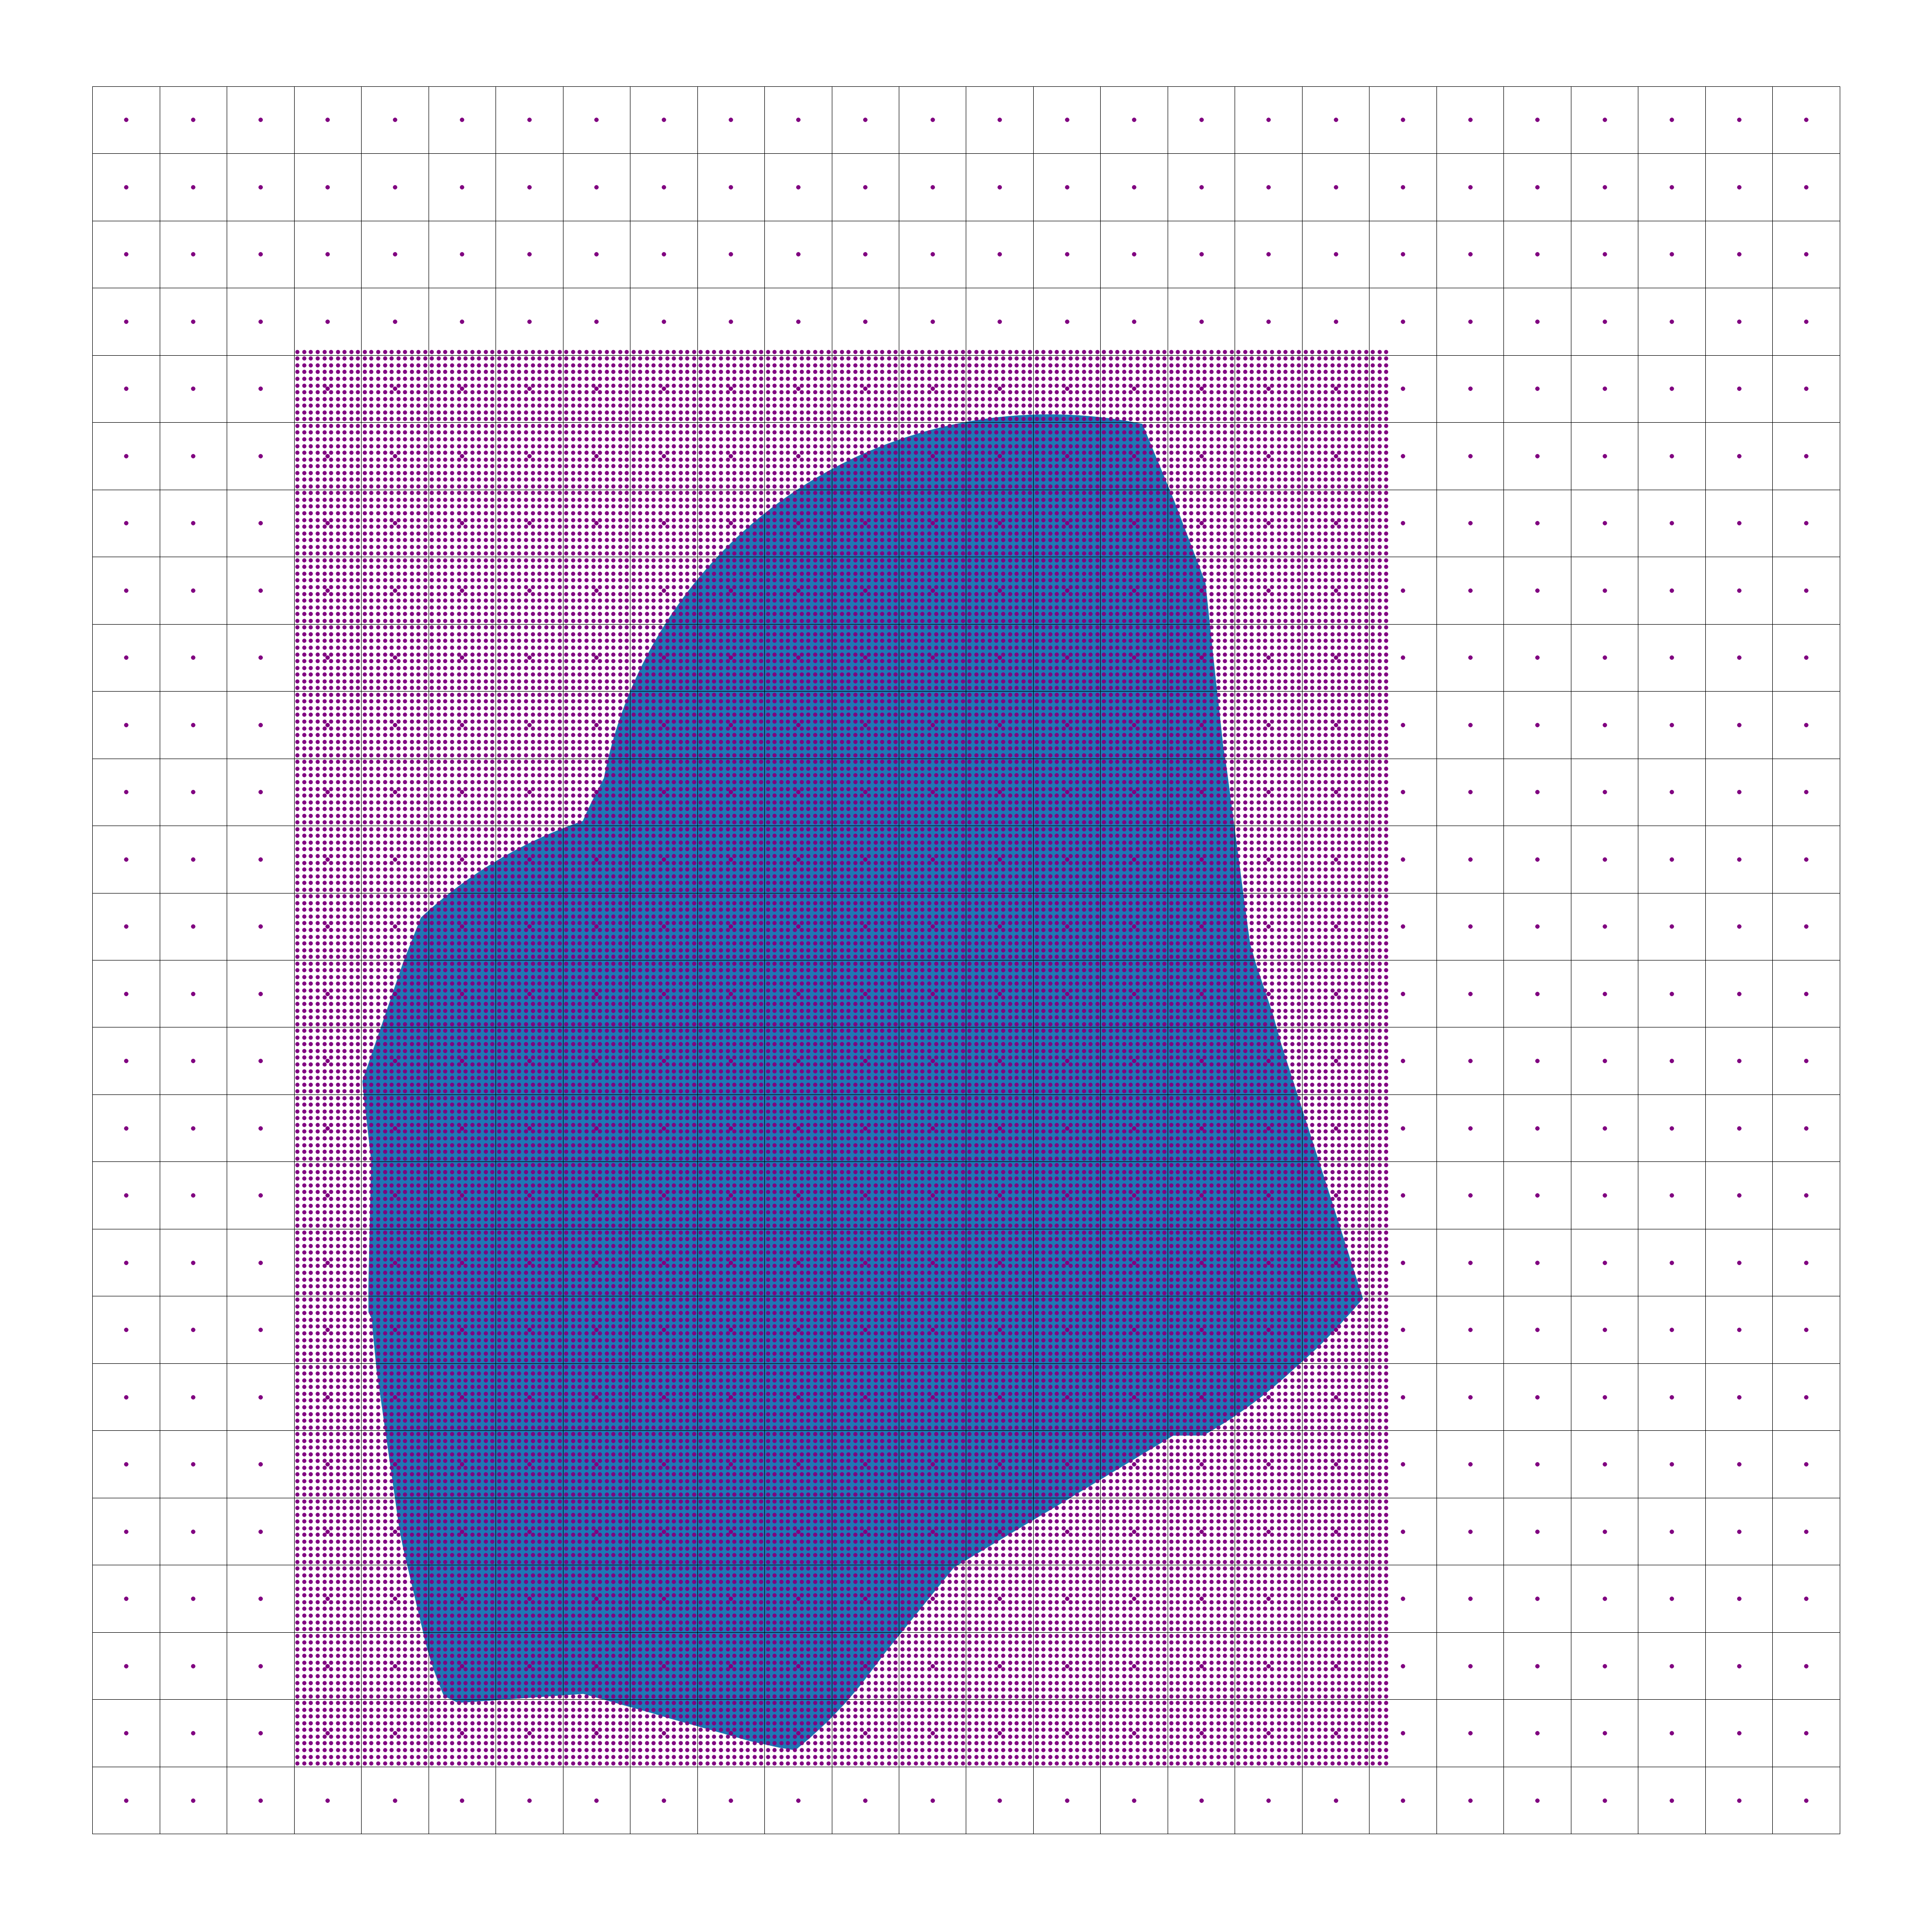

In [145]:
fig, ax = plt.subplots(figsize=(50, 50))
df_eez.plot(ax=ax)
boundary.plot(ax=ax,facecolor="none", 
              edgecolor='black', lw=0.7)
current_points.plot(ax=ax, markersize=5, color="black")
outlook_points.plot(ax=ax, markersize=25, color="purple")
ax.axis("off")
plt.axis('equal')
plt.show()
    

In [ ]:
for x in longlat:
    point = Point(x[0],x[1])
    if eez.contains(point) or point.within(eez):
        in_palau.append((x[0],x[1]))
df[df[['lon', 'lat']].apply(tuple, axis=1).isin(in_palau)]

In [22]:
crw_list = []
for x in os.listdir("./CRW-Outlook/box/pkl/2011"):
    crw_list.append(pd.read_pickle('./CRW-Outlook/box/pkl/2011/' + x))
crw2011 = pd.concat(crw_list)
crw2011 = crw2011.sort_values(by=["time"])
crwoutlooktime = crw2011['time'].unique()

In [23]:
list(crwoutlooktime)

[numpy.datetime64('2011-07-10T12:00:00.000000000'),
 numpy.datetime64('2011-07-17T12:00:00.000000000'),
 numpy.datetime64('2011-07-24T12:00:00.000000000'),
 numpy.datetime64('2011-07-31T12:00:00.000000000'),
 numpy.datetime64('2011-08-07T12:00:00.000000000'),
 numpy.datetime64('2011-08-14T12:00:00.000000000'),
 numpy.datetime64('2011-08-21T12:00:00.000000000'),
 numpy.datetime64('2011-08-28T12:00:00.000000000'),
 numpy.datetime64('2011-09-04T12:00:00.000000000'),
 numpy.datetime64('2011-09-11T12:00:00.000000000'),
 numpy.datetime64('2011-09-18T12:00:00.000000000'),
 numpy.datetime64('2011-09-25T12:00:00.000000000'),
 numpy.datetime64('2011-10-02T12:00:00.000000000'),
 numpy.datetime64('2011-10-09T12:00:00.000000000'),
 numpy.datetime64('2011-10-16T12:00:00.000000000'),
 numpy.datetime64('2011-10-23T12:00:00.000000000'),
 numpy.datetime64('2011-10-30T12:00:00.000000000'),
 numpy.datetime64('2011-11-06T12:00:00.000000000'),
 numpy.datetime64('2011-11-13T12:00:00.000000000'),
 numpy.datet

In [24]:
crw2011current = pd.read_pickle("../../CRW/pkl/2011.pkl").sort_values(by="time")
crwcurrenttime = crw2011current['time'].unique()

In [26]:
list(crwcurrenttime)

[numpy.datetime64('2011-01-01T12:00:00.000000000'),
 numpy.datetime64('2011-01-02T12:00:00.000000000'),
 numpy.datetime64('2011-01-03T12:00:00.000000000'),
 numpy.datetime64('2011-01-04T12:00:00.000000000'),
 numpy.datetime64('2011-01-05T12:00:00.000000000'),
 numpy.datetime64('2011-01-06T12:00:00.000000000'),
 numpy.datetime64('2011-01-07T12:00:00.000000000'),
 numpy.datetime64('2011-01-08T12:00:00.000000000'),
 numpy.datetime64('2011-01-09T12:00:00.000000000'),
 numpy.datetime64('2011-01-10T12:00:00.000000000'),
 numpy.datetime64('2011-01-11T12:00:00.000000000'),
 numpy.datetime64('2011-01-12T12:00:00.000000000'),
 numpy.datetime64('2011-01-13T12:00:00.000000000'),
 numpy.datetime64('2011-01-14T12:00:00.000000000'),
 numpy.datetime64('2011-01-15T12:00:00.000000000'),
 numpy.datetime64('2011-01-16T12:00:00.000000000'),
 numpy.datetime64('2011-01-17T12:00:00.000000000'),
 numpy.datetime64('2011-01-18T12:00:00.000000000'),
 numpy.datetime64('2011-01-19T12:00:00.000000000'),
 numpy.datet

In [28]:
dif = []
for t in crwoutlooktime:
    if t not in crwcurrenttime:
        dif.append(t)
print(dif)

[]


In [29]:
crw2011weekly = pd.read_pickle("../../CRW/weekly/pkl/2011.pkl").sort_values(by="time")
crwweeklytime = crw2011weekly['time'].unique()

In [30]:
crwweeklytime

array(['2011-01-01T12:00:00.000000000', '2011-01-08T12:00:00.000000000',
       '2011-01-15T12:00:00.000000000', '2011-01-22T12:00:00.000000000',
       '2011-01-29T12:00:00.000000000', '2011-02-05T12:00:00.000000000',
       '2011-02-12T12:00:00.000000000', '2011-02-19T12:00:00.000000000',
       '2011-02-26T12:00:00.000000000', '2011-03-05T12:00:00.000000000',
       '2011-03-12T12:00:00.000000000', '2011-03-19T12:00:00.000000000',
       '2011-03-26T12:00:00.000000000', '2011-04-02T12:00:00.000000000',
       '2011-04-09T12:00:00.000000000', '2011-04-16T12:00:00.000000000',
       '2011-04-23T12:00:00.000000000', '2011-04-30T12:00:00.000000000',
       '2011-05-07T12:00:00.000000000', '2011-05-14T12:00:00.000000000',
       '2011-05-21T12:00:00.000000000', '2011-05-28T12:00:00.000000000',
       '2011-06-04T12:00:00.000000000', '2011-06-11T12:00:00.000000000',
       '2011-06-18T12:00:00.000000000', '2011-06-25T12:00:00.000000000',
       '2011-07-02T12:00:00.000000000', '2011-07-09

In [31]:
dif = []
for t in crwoutlooktime:
    if t not in crwweeklytime:
        dif.append(t)
print(dif)

[numpy.datetime64('2011-07-10T12:00:00.000000000'), numpy.datetime64('2011-07-17T12:00:00.000000000'), numpy.datetime64('2011-07-24T12:00:00.000000000'), numpy.datetime64('2011-07-31T12:00:00.000000000'), numpy.datetime64('2011-08-07T12:00:00.000000000'), numpy.datetime64('2011-08-14T12:00:00.000000000'), numpy.datetime64('2011-08-21T12:00:00.000000000'), numpy.datetime64('2011-08-28T12:00:00.000000000'), numpy.datetime64('2011-09-04T12:00:00.000000000'), numpy.datetime64('2011-09-11T12:00:00.000000000'), numpy.datetime64('2011-09-18T12:00:00.000000000'), numpy.datetime64('2011-09-25T12:00:00.000000000'), numpy.datetime64('2011-10-02T12:00:00.000000000'), numpy.datetime64('2011-10-09T12:00:00.000000000'), numpy.datetime64('2011-10-16T12:00:00.000000000'), numpy.datetime64('2011-10-23T12:00:00.000000000'), numpy.datetime64('2011-10-30T12:00:00.000000000'), numpy.datetime64('2011-11-06T12:00:00.000000000'), numpy.datetime64('2011-11-13T12:00:00.000000000'), numpy.datetime64('2011-11-20T1

In [32]:
crw_list = []
for x in os.listdir("./CRW-Outlook/box/pkl/2012"):
    crw_list.append(pd.read_pickle('./CRW-Outlook/box/pkl/2012/' + x))
crw2012 = pd.concat(crw_list)
crw2012 = crw2012.sort_values(by=["time"])
crwoutlook2012time = crw2012['time'].unique()

In [33]:
crw2012weekly = pd.read_pickle("../../CRW/weekly/pkl/2012.pkl").sort_values(by="time")
crwweeklytime = crw2012weekly['time'].unique()

In [35]:
dif = []
for t in crwoutlook2012time:
    if t not in crwweeklytime:
        dif.append(t)
print(dif)

[]


In [ ]:
pd.read_pickle("./CRW-Outlook/box/pkl/2011")

In [11]:
pd.read_pickle("../../CRW/pkl/2011.pkl")

,time,latitude,longitude,CRW_BAA,CRW_BAA_mask,CRW_BAA_7D_MAX,CRW_BAA_7D_MAX_mask,CRW_DHW,CRW_DHW_mask,CRW_HOTSPOT,CRW_HOTSPOT_mask,CRW_SEAICE,CRW_SST,CRW_SSTANOMALY,CRW_SSTANOMALY_mask,year
3164156,2011-01-01 12:00:00,12.025,129.024994,1.0,0.0,1.0,0.0,0.14,0.0,0.07,0.0,NaN,29.55,1.77,0.0,2011
3164157,2011-01-01 12:00:00,12.025,129.074997,1.0,0.0,1.0,0.0,0.00,0.0,0.05,0.0,NaN,29.53,1.75,0.0,2011
3164158,2011-01-01 12:00:00,12.025,129.125000,1.0,0.0,1.0,0.0,0.00,0.0,0.03,0.0,NaN,29.51,1.73,0.0,2011
3164159,2011-01-01 12:00:00,12.025,129.175003,1.0,0.0,1.0,0.0,0.00,0.0,0.02,0.0,NaN,29.50,1.72,0.0,2011
3164160,2011-01-01 12:00:00,12.025,129.225006,0.0,0.0,1.0,0.0,0.00,0.0,0.00,0.0,NaN,29.48,1.70,0.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15855168,2011-12-31 12:00:00,1.525,136.925003,1.0,0.0,1.0,0.0,0.00,0.0,0.19,0.0,NaN,29.64,0.86,0.0,2011
15855169,2011-12-31 12:00:00,1.525,136.975006,1.0,0.0,1.0,0.0,0.00,0.0,0.19,0.0,NaN,29.64,0.85,0.0,2011
15855170,2011-12-31 12:00:00,1.525,137.024994,1.0,0.0,1.0,0.0,0.00,0.0,0.20,0.0,NaN,29.65,0.86,0.0,2011
15855171,2011-12-31 12:00:00,1.525,137.074997,1.0,0.0,1.0,0.0,0.00,0.0,0.21,0.0,NaN,29.66,0.86,0.0,2011


In [10]:
cfs_dfs_list = []
for x in os.listdir("../../CRW/pkl"):
    print(pd.read_pickle("../../CRW/pkl/" + x))
#     cfs_dfs_list.append(pd.read_pickle("./CFS/pkl/"+x))
    break

                        time  latitude   longitude  CRW_BAA  CRW_BAA_mask  \
3164156  1999-01-01 12:00:00    12.025  129.024994      0.0           0.0   
3164157  1999-01-01 12:00:00    12.025  129.074997      0.0           0.0   
3164158  1999-01-01 12:00:00    12.025  129.125000      0.0           0.0   
3164159  1999-01-01 12:00:00    12.025  129.175003      0.0           0.0   
3164160  1999-01-01 12:00:00    12.025  129.225006      0.0           0.0   
...                      ...       ...         ...      ...           ...   
15855168 1999-12-31 12:00:00     1.525  136.925003      1.0           0.0   
15855169 1999-12-31 12:00:00     1.525  136.975006      1.0           0.0   
15855170 1999-12-31 12:00:00     1.525  137.024994      1.0           0.0   
15855171 1999-12-31 12:00:00     1.525  137.074997      1.0           0.0   
15855172 1999-12-31 12:00:00     1.525  137.125000      1.0           0.0   

          CRW_BAA_7D_MAX  CRW_BAA_7D_MAX_mask  CRW_DHW  CRW_DHW_mask  \
316